In [ ]:
import pandas as pd
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)
import warnings
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/bootcamp_data_science/IA_aplicada_al_Procesamiento_de_Lenguaje_Natural/proyecto_final/dataset/colombian_elections.csv')

In [ ]:
df.head()

,Unnamed: 0,tweet_id,tweetText,polarity_value,polarity_type,topic,set
0,2,ID:142391947707940864,@marodriguezb Gracias MAR,P,AGREEMENT,otros,train
1,3,ID:142416095012339712,"Off pensando en el regalito Sinde, la que se va de la SGAE cuando se van sus corruptos. Intento no sacar conclusiones (lo intento)",N,AGREEMENT,política,train
2,4,ID:142422495721562112,Conozco a alguien q es adicto al drama! Ja ja ja te suena d algo!,P,AGREEMENT,otros,train
3,6,ID:142483342040907776,Toca @crackoviadeTV3 . Grabación dl especial Navideño...Mari crismas!,P,AGREEMENT,entretenimiento,train
4,8,ID:142494476051562496,Buen día todos! Lo primero mandar un abrazo grande a Miguel y a su familia @libertadmontes Hoy podría ser un día para la grandeza humana.,P,AGREEMENT,otros,train


In [ ]:
df = df[['tweetText','polarity_value']].rename(columns={"tweetText":"texto","polarity_value":"sentimiento"})

In [ ]:
df.head()

,texto,sentimiento
0,@marodriguezb Gracias MAR,P
1,"Off pensando en el regalito Sinde, la que se va de la SGAE cuando se van sus corruptos. Intento no sacar conclusiones (lo intento)",N
2,Conozco a alguien q es adicto al drama! Ja ja ja te suena d algo!,P
3,Toca @crackoviadeTV3 . Grabación dl especial Navideño...Mari crismas!,P
4,Buen día todos! Lo primero mandar un abrazo grande a Miguel y a su familia @libertadmontes Hoy podría ser un día para la grandeza humana.,P


In [ ]:
#recvisamos la distribucion de los datos para ver si son actos apra el modelo
df['sentimiento'].value_counts()

P    2884
N    2182
Name: sentimiento, dtype: int64

In [ ]:
#importamos
from sklearn.model_selection import train_test_split

In [ ]:
#almecemos en nuestro modelo los df para entrenar y testar.S
X_train, X_test, y_train,y_test = train_test_split(df.texto,df.sentimiento,random_state = 41)

In [ ]:
X_train

3417                            Buenas tardes amig@s. En la ciudad del fútbol y ahora entrenamiento de La Roja. Contento de volver a ver a mis compañeros.
3441                                              @FedericoQuevedo @mananascuatro Es que me gusta tooooooodooooooo!!! Me siento joven cuando la escucho!!!
4513                                                                                  @SSantiagosegura tintín...he perfao...no atisbo a.... Viva Landa!!;)
538                                @RV1805 @RdscubreNavidad Es una pasion navideña! Y dentro de una semana os enseñare el mio, con figuras de 21 cm. Besos
2164          Interesante reflexion clarificadora.Responsibility While Protecting -Gareth Evans - Project Syndicate http://t.co/imH4Ucww vía @ProSyn #oped
1780                                                                                 Rossy de Palma y Alaska, en busca de la polémica http://t.co/Fq6dVNOv
1204            El T. Constitucional decidirá en Pleno sobre nuestro r

In [ ]:
#importamos el modelo de regresion lineal
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

In [ ]:
#guaramos en un variable el modelo
regression = LinearRegression()
#definimos los datos para que se entrene le modelo
regression.fit(X_train,y_train)
# introducimos los datos para la preccion y la guaramos n eun varaible
acc = regression.score(X_test,y_test)
print(acc)

ValueError: ignored

In [ ]:
df[2:3]

,texto,sentimiento
2,Conozco a alguien q es adicto al drama! Ja ja ja te suena d algo!,P


In [ ]:
#creamos una nueva  columna para  donde colocamos  0 y 1 para q not engamos el problema de trasfroamar un string a un float.
df['sentiment'] = df['sentimiento'].replace(["N","P"],[0,1])

In [ ]:
df.shape

(5066, 3)

In [ ]:
df.head()

,texto,sentimiento,sentiment
0,@marodriguezb Gracias MAR,P,1
1,"Off pensando en el regalito Sinde, la que se va de la SGAE cuando se van sus corruptos. Intento no sacar conclusiones (lo intento)",N,0
2,Conozco a alguien q es adicto al drama! Ja ja ja te suena d algo!,P,1
3,Toca @crackoviadeTV3 . Grabación dl especial Navideño...Mari crismas!,P,1
4,Buen día todos! Lo primero mandar un abrazo grande a Miguel y a su familia @libertadmontes Hoy podría ser un día para la grandeza humana.,P,1


In [ ]:
from nltk import tokenize

In [ ]:
#aprendemos un pcoco de segregacion

frase = "hola chicos y chicas!"
token_puntuacion = tokenize.WordPunctTokenizer()
token_frase = token_puntuacion.tokenize(frase)
print(token_frase)

['hola', 'chicos', 'y', 'chicas', '!']


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
texto = ["Las propuestas son buenas", "Las propuestas son malas"]

vectorizer = CountVectorizer(lowercase=False)

bag_of_words = vectorizer.fit_transform(texto)

In [ ]:
bag_of_words
#matriz esparsa es un amtriz con mchos ceros.

<2x5 sparse matrix of type '<class 'numpy.int64'>'
	with 8 stored elements in Compressed Sparse Row format>

In [ ]:
print(bag_of_words.shape)

(2, 5)


In [ ]:
vectorizer.get_feature_names_out()

array(['Las', 'buenas', 'malas', 'propuestas', 'son'], dtype=object)

In [ ]:
matrix = pd.DataFrame.sparse.from_spmatrix(bag_of_words, columns = vectorizer.get_feature_names_out())

In [ ]:
matrix

,Las,buenas,malas,propuestas,son
0,1,1,0,1,1
1,1,0,1,1,1


In [ ]:
vectorizer2 = CountVectorizer(lowercase=False, max_features = 100)

bag_of_words2 = vectorizer2.fit_transform(df.texto)

In [ ]:
print(bag_of_words2.shape)

(5066, 100)


In [ ]:
#definimos las varaiable o datos de x y y para entrenar y testar
X_train, X_test, y_train,y_test = train_test_split(bag_of_words2,df.sentiment,random_state = 41)

In [ ]:
#entrenemos el modelo
regression = LinearRegression()
regression.fit(X_train,y_train)
acc = regression.score(X_test,y_test)
print(acc)

0.16872853413298272


In [ ]:
#entremos un nuevo modelo.
regression = LogisticRegression()
regression.fit(X_train,y_train)
acc = regression.score(X_test,y_test)
print(acc)

0.6827150749802684


In [ ]:
#creamos una fucnion siguiendolas buenas practicas ya que litilizaeremos el proceso freceutemente
#cremos columnas
def clasificador(texto, columna_texto, categoria):
  #instaciamos el vectorizer
  vectorizer = CountVectorizer(lowercase=False, max_features = 400)
  bag_of_words = vectorizer.fit_transform(texto[columna_texto])
  #definimos lo dats arap el entrenamiento y para las prueba. en este caso sera nuentro bow(bag of words)y la coumna categoria q estamos añadiendo al df
  X_train, X_test, y_train,y_test = train_test_split(bag_of_words,texto[categoria],random_state = 41)
  regression = LogisticRegression()
  regression.fit(X_train,y_train)
  return regression.score(X_test,y_test)

In [ ]:
clasificador(df, "texto", "sentiment")

0.7198105761641673

In [ ]:
from wordcloud import WordCloud
#

In [ ]:
#juntamos concatenendolas todas la spalabras de df con un espacio
palabras = ' '.join([palabras for palabras in df['texto']])

In [ ]:
palabras

'@marodriguezb Gracias MAR Off pensando en el regalito Sinde, la que se va de la SGAE cuando se van sus corruptos. Intento no sacar conclusiones (lo intento) Conozco a alguien q es adicto al drama! Ja ja ja te suena d algo! Toca @crackoviadeTV3 . Grabación dl especial Navideño...Mari crismas! Buen día todos! Lo primero mandar un abrazo grande a Miguel y a su familia @libertadmontes Hoy podría ser un día para la grandeza humana. Desde el escaño. Todo listo para empezar #endiascomohoy en el Congreso http://t.co/Mu2yIgCb Bdías. EM no se ira de puente. Si vosotros os vais no dejeis de llevar la tableta o el PC y desde luego Orbyt. De momento no digo más. Un sistema económico q recorta dinero para prestaciones sociales y refuerza con billón y medio d euros a los bancos, no necesita repensarse? #programascambiados caca d ajuste Buen viernes “@adri_22_22: #programascambiados es TT gracias a @Carlos_Latre” GRACIAS POR EL BUEN RATO AMIGOS!!;) La Universidad confía en De la Calle para encarar su

In [ ]:
len(palabras)

556945

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
#q nos permita imprimir el plot ne le notebook
#creamos una funcion con algunosapramatros por default del grafico.
def plot_cloud(wordcloud):
  plt.figure(figsize=(10,5))
  plt.imshow(wordcloud, interpolation = 'bilinear')
  plt.axis('off')

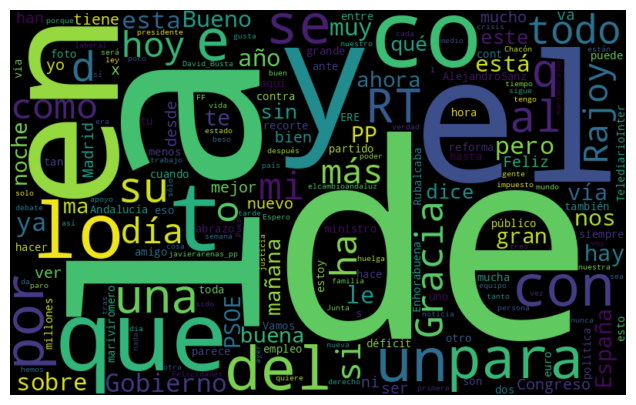

In [ ]:
wordcloud = WordCloud(width=800, height=500, collocations=False).generate(palabras)
plot_cloud(wordcloud)

In [ ]:
df_pos = df.query("sentimiento == 'P'")

In [ ]:
df_pos.head()

,texto,sentimiento,sentiment
0,@marodriguezb Gracias MAR,P,1
2,Conozco a alguien q es adicto al drama! Ja ja ja te suena d algo!,P,1
3,Toca @crackoviadeTV3 . Grabación dl especial Navideño...Mari crismas!,P,1
4,Buen día todos! Lo primero mandar un abrazo grande a Miguel y a su familia @libertadmontes Hoy podría ser un día para la grandeza humana.,P,1
5,Desde el escaño. Todo listo para empezar #endiascomohoy en el Congreso http://t.co/Mu2yIgCb,P,1


In [ ]:
def plot_cloud_neg(texto):
  df_neg = df.query("sentimiento == 'N'")
  palabras = ' '.join([palabras for palabras in df_neg['texto']])
  wordcloud = WordCloud(width=800, height=500, collocations=False).generate(palabras)
  plt.figure(figsize=(10,5))
  plt.imshow(wordcloud, interpolation = 'bilinear')
  plt.axis('off')

In [ ]:
def plot_cloud_pos(texto):
  df_pos = df.query("sentimiento == 'P'")
  palabras = ' '.join([palabras for palabras in df_pos['texto']])
  wordcloud = WordCloud(width=800, height=500, collocations=False).generate(palabras)
  plt.figure(figsize=(10,5))
  plt.imshow(wordcloud, interpolation = 'bilinear')
  plt.axis('off')

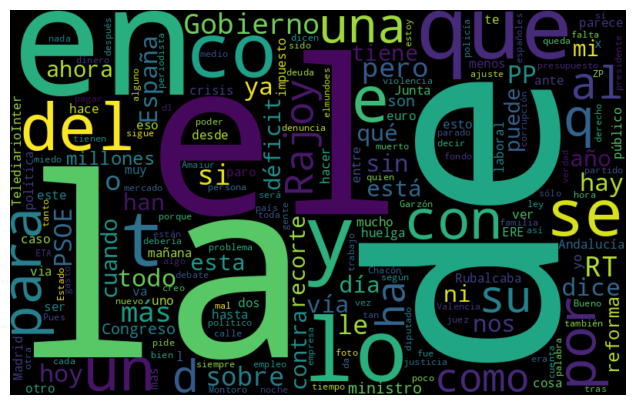

In [ ]:
plot_cloud_neg(df)

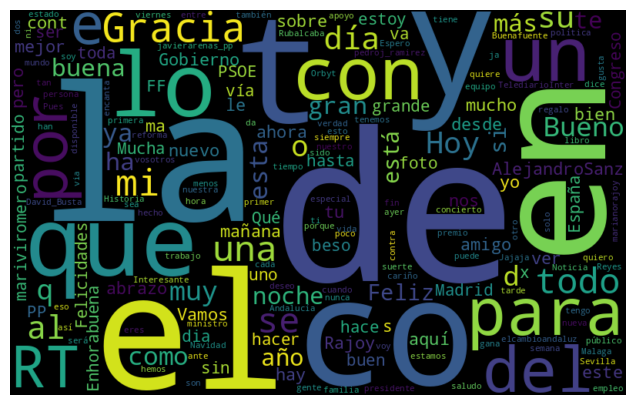

In [ ]:
plot_cloud_pos(df)

In [ ]:
import nltk
#libreaode de procesacmiento del lenguaje natural.

frase =['el candidato es bueno', 'el candidato es malo']
#calculamos la frecuencia
frequencia = nltk.FreqDist(frase)

In [ ]:
frequencia

FreqDist({'el candidato es bueno': 1, 'el candidato es malo': 1})

In [ ]:
from nltk import tokenize
#vamos tokenizar nltk

In [ ]:
frase2 = 'el candidato quiere aprender LNP!'
#instancaimos
token_espacio = tokenize.WhitespaceTokenizer()
#crreamos uestra frase tonkenizada
frase_token = token_espacio.tokenize(frase2)

In [ ]:
print(frase_token)

['el', 'candidato', 'quiere', 'aprender', 'LNP!']


In [ ]:
frase_token = token_espacio.tokenize(palabras)

frequencia = nltk.FreqDist(frase_token)

df_frequencia = pd.DataFrame({'palabra':list(frequencia.keys()), 'frequencia':list(frequencia.values())})

In [ ]:
df_frequencia.head()

,palabra,frequencia
0,@marodriguezb,3
1,Gracias,119
2,MAR,1
3,Off,1
4,pensando,5


In [ ]:
df_frequencia.nlargest(columns='frequencia',n=10)

,palabra,frequencia
13,de,3863
9,la,2365
6,el,1929
5,en,1886
26,a,1886
57,y,1655
10,que,1575
107,los,934
170,del,863
20,no,713


In [ ]:
import seaborn as sns

[Text(0, 0.5, 'conteo')]

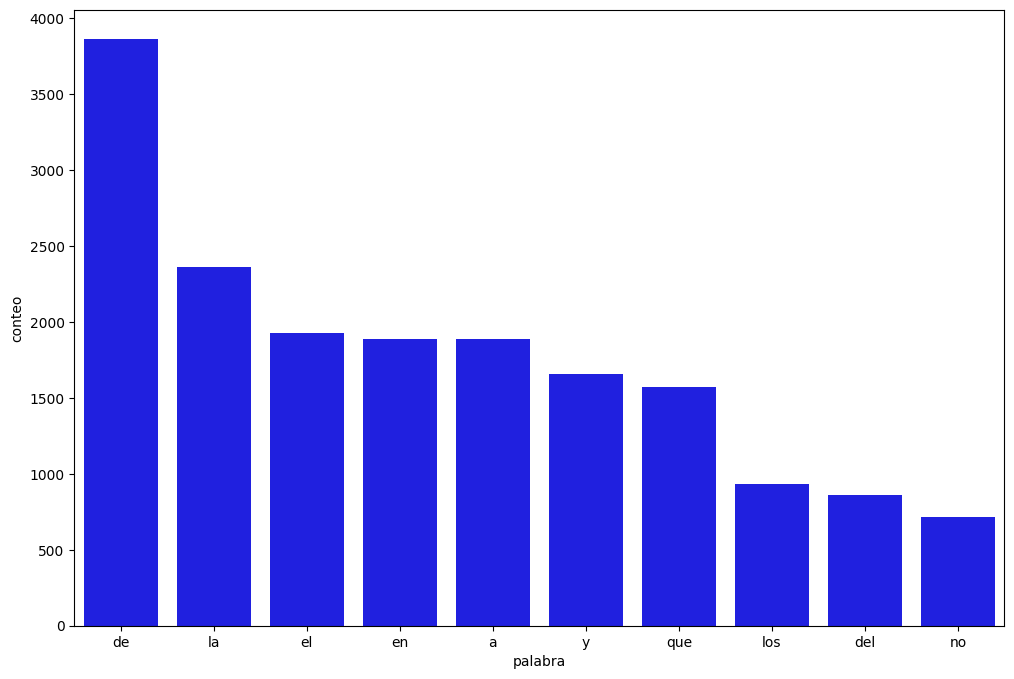

In [ ]:
plt.figure(figsize=(12,8))
ax = sns.barplot(data=df_frequencia.nlargest(columns='frequencia',n=10), x="palabra", y="frequencia", color="blue")
ax.set(ylabel="conteo")

In [ ]:
def histo_barras(texto, columna_texto, cantidad):

  plt.figure(figsize=(12,8))

  palabras = ' '.join([palabras for palabras in df['texto']])

  frase_token = token_espacio.tokenize(palabras)

  frequencia = nltk.FreqDist(frase_token)

  df_frequencia = pd.DataFrame({'palabra':list(frequencia.keys()), 'frequencia':list(frequencia.values())})

  df_frequencia = df_frequencia.nlargest(columns='frequencia', n = cantidad)

  ax = sns.barplot(data=df_frequencia, x='palabra', y='frequencia', color='gray')

  ax.set(ylabel = 'conteo')

  plt.show()

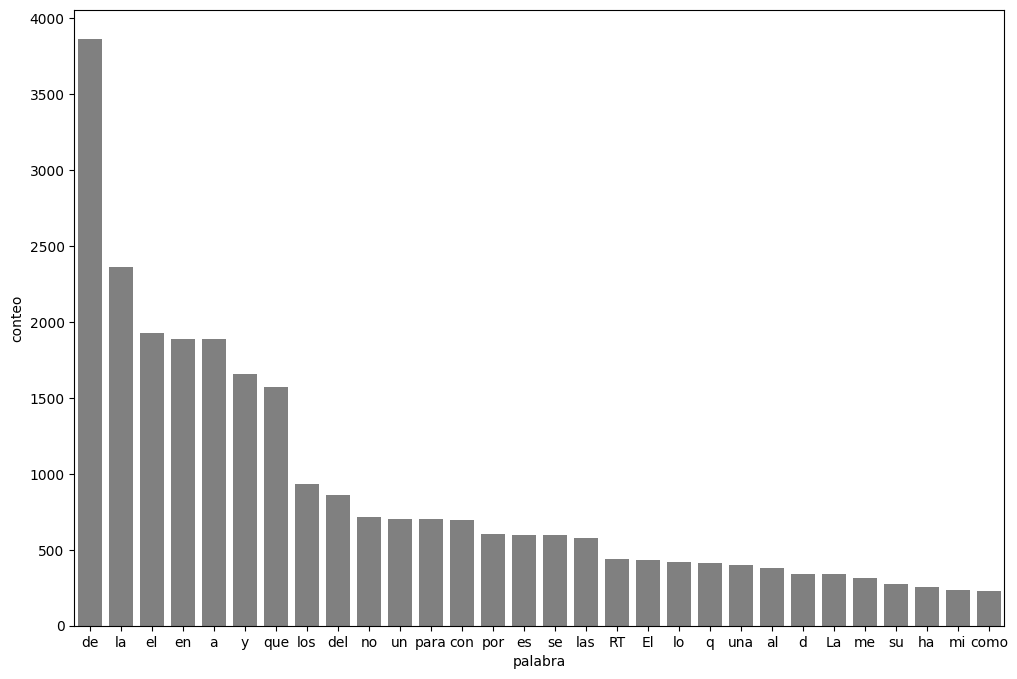

In [ ]:
histo_barras(df, "texto", 30)

In [ ]:
from nltk.corpus import stopwords
import nltk
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
irrelevantes = nltk.corpus.stopwords.words('spanish')

frase_process = list()

for opinion in df.texto:
  nueva_frase = list()
  palabras_texto = token_espacio.tokenize(opinion)
  for palabra in palabras_texto:
    if palabra not in irrelevantes:
      nueva_frase.append(palabra)
  frase_process.append(' '.join(nueva_frase))

df['tratamiento_1'] = frase_process

In [ ]:
df.head()

,texto,sentimiento,sentiment,tratamiento_1
0,@marodriguezb Gracias MAR,P,1,@marodriguezb Gracias MAR
1,"Off pensando en el regalito Sinde, la que se va de la SGAE cuando se van sus corruptos. Intento no sacar conclusiones (lo intento)",N,0,"Off pensando regalito Sinde, va SGAE van corruptos. Intento sacar conclusiones (lo intento)"
2,Conozco a alguien q es adicto al drama! Ja ja ja te suena d algo!,P,1,Conozco alguien q adicto drama! Ja ja ja suena d algo!
3,Toca @crackoviadeTV3 . Grabación dl especial Navideño...Mari crismas!,P,1,Toca @crackoviadeTV3 . Grabación dl especial Navideño...Mari crismas!
4,Buen día todos! Lo primero mandar un abrazo grande a Miguel y a su familia @libertadmontes Hoy podría ser un día para la grandeza humana.,P,1,Buen día todos! Lo primero mandar abrazo grande Miguel familia @libertadmontes Hoy podría ser día grandeza humana.


In [ ]:
clasificador(df, "tratamiento_1", "sentiment")

0.6977111286503551